In [1]:
import numpy as np
import pandas as pd
import librosa
from IPython.display import Audio, display
import IPython
import librosa.display

import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
from scipy.io import wavfile
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [2]:
from glob import glob
from tqdm import tqdm

domain_dirs = ['/kaggle/input/interspeech-2025/district_wise/Barishal/*/*.wav', 
               '/kaggle/input/interspeech-2025/district_wise/Chittagong/*/*.wav', 
               '/kaggle/input/interspeech-2025/district_wise/Comilla/*/*.wav', 
               '/kaggle/input/interspeech-2025/district_wise/Habiganj/*/*.wav', 
               '/kaggle/input/interspeech-2025/district_wise/Kishoreganj/*/*.wav',
               '/kaggle/input/interspeech-2025/district_wise/Narail/*/*.wav',
               '/kaggle/input/interspeech-2025/district_wise/Narsingdi/*/*.wav',
               '/kaggle/input/interspeech-2025/district_wise/Noakhali/*/*.wav',
               '/kaggle/input/interspeech-2025/district_wise/Rangpur/*/*.wav',
               '/kaggle/input/interspeech-2025/district_wise/Sandwip/*/*.wav',
               '/kaggle/input/interspeech-2025/district_wise/Sylhet/*/*.wav',
               '/kaggle/input/interspeech-2025/district_wise/Tangail/*/*.wav',
               '/kaggle/input/bengaliai-speech/train_mp3s/*.mp3'
              ]

domains = ['Barishal', 'Chittagong', 'Comilla', 'Habiganj', 'Kishoreganj', 'Narail', 'Narsingdi', 'Noakhali', 'Rangpur', 'Sandwip', 'Sylhet', 'Tangail', 'OOD_Train_Set']

In [3]:
arr = []
for domain, domain_dir in zip(domains, domain_dirs):
    data = [] # X
    
    #filenames = glob(domain_dir)
    
    if domain=='OOD_Train_Set':
        filenames = glob(domain_dir)[:10000]
    else:
        filenames = glob(domain_dir)


#     for file in tqdm(filenames):
#         temp = scipy.io.wavfile.read(file, mmap=False)
#         data.append(temp[1])
        
    motherArr = []
    for each in tqdm(filenames):
        data, sampling_rate = librosa.load(each)

        n_fft = 2048 # FFT window size
        hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

        D = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)
        S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
        S_db_mean = np.mean(S_db, axis = 1)
        motherArr.append(S_db_mean)
        
    motherArr_mean = np.mean(motherArr, axis = 0)
    arr.append(motherArr_mean)

100%|██████████| 10000/10000 [04:22<00:00, 38.10it/s]


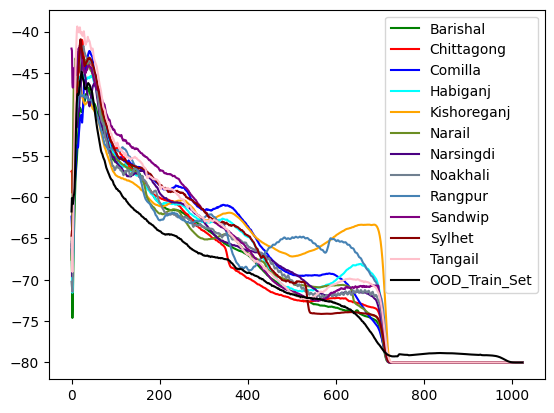

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.plot(arr[0], color = 'green', label = domains[0])
ax.plot(arr[1], color = 'red', label = domains[1])
ax.plot(arr[2], color = 'blue', label = domains[2])
ax.plot(arr[3], color = 'aqua', label = domains[3])
ax.plot(arr[4], color = 'orange', label = domains[4])
ax.plot(arr[5], color = 'olivedrab', label = domains[5])
ax.plot(arr[6], color = 'indigo', label = domains[6])
ax.plot(arr[7], color = 'slategray', label = domains[7])
ax.plot(arr[8], color = 'steelblue', label = domains[8])
ax.plot(arr[9], color = 'purple', label = domains[9])
ax.plot(arr[10], color = 'darkred', label = domains[10])
ax.plot(arr[11], color = 'pink', label = domains[11])
ax.plot(arr[12], color = 'black', label = domains[12])

ax.legend(loc = 'upper right')
plt.savefig('LTSA.png')
plt.show()

In [5]:
 plt.savefig('/kaggle/working/LTSA.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
filenames

In [ ]:
plt.plot(motherArr_mean)